<h1 style='color:teal' align='center'>Data Science Project: Bank Customer Churn</h1>

#### Life cycle of Data Science Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis (EDA)
5. Model Training
6. Choose best model

### 1. Problem statement
This project is about knowing which customers are likely to leave or unsubscribe from your service. 
We will dentify customers at risk of churn in order to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.

### 2. Data Collection
Dataset Source - https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

### 2.1 Description
This dataset is for ABC Multistate bank with following columns:
- Customer ID - The Unique ID of each individual customer
- Credit Score - A number depicting the customer’s credithworthiness
- Country - The country the customer banks from
- Gender - The gender the customer identifies with
- Age - Depicts the customers age
- Tenure - Indicates how length in years the customer has been with the bank
- Balance - The amount currently available in the customer’s account
- Products Number - The number of products purchased by the customer through the bank
- Credit Card - Indicates the customer has a credit card
- Active Member - Indicates if the customer is an active or inactive
- Estimated Salary - Bank Estimation of the income of the customer
- Churn - Indicator of if the customer has left the bank or not

### 2.2 Import Data and Required Packages

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2.3 Import Dataset 

In [47]:
# Import the CSV Data as Pandas DataFrame
data_frame = pd.read_csv('Bank_data.csv')
# Print top 5 data
data_frame.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Data Checks to perform
- Check Number of rows and columns
- Check Missing values
- Check Duplicates
- Check Data Type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

### 3.1 Check Number of rows and columns

In [48]:
# Shape of the dataset
data_frame.shape

(10000, 12)

### 3.2 Check Missing values

In [49]:
data_frame.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### 3.3 Check Duplicates

In [50]:
data_frame.duplicated().sum()

0

### 3.4 Check Data Type

In [51]:
data_frame.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

### 3.5 Check the number of unique values of each column

In [52]:
data_frame.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

### 4. Exploratory Data Analysis (EDA)

### 4. 1 Descriptive Statistics

In [53]:
data_frame.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### 4.2 Data Visualization

<AxesSubplot: xlabel='gender', ylabel='count'>

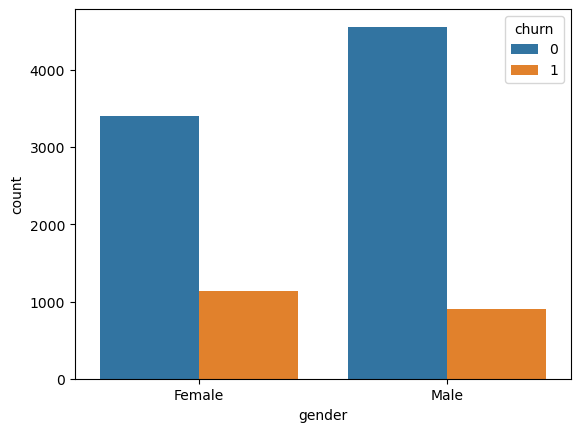

In [54]:
sns.countplot(x='gender', hue='churn', data=data_frame)

#### the issue doesn't seem to be based on gender since there is no much of difference between females and males who left

In [55]:
retained = data_frame[data_frame.churn == 0].shape[0]
churned = data_frame[data_frame.churn == 1].shape[0]

print(retained / (retained + churned) * 100, '% of the customers stayed with the company.')

print(churned / (retained + churned) * 100, '% of the customers left with the company.')

79.63 % of the customers stayed with the company.
20.369999999999997 % of the customers left with the company.


In [56]:
data_frame['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

#### Based on the result in percentage and value count we can see that the data is imbalanced, they are not around 50/50

<AxesSubplot: xlabel='country', ylabel='count'>

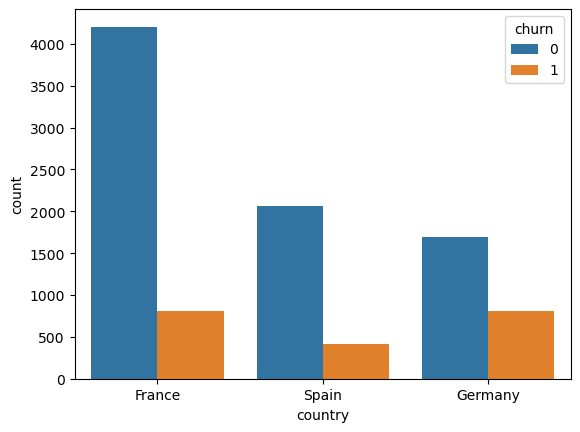

In [57]:
sns.countplot(x='country', hue='churn', data=data_frame)

#### France is the country which has a lot of customers who left followed by Germany. Who have stayed a lot are from France and followed by Span

In [58]:
data_frame['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<AxesSubplot: xlabel='tenure', ylabel='count'>

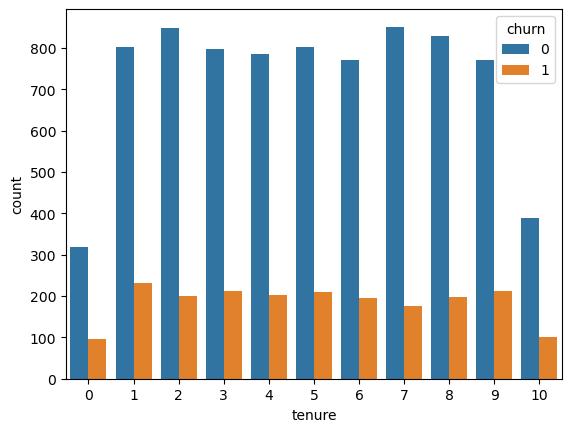

In [59]:
sns.countplot(x='tenure', hue='churn', data=data_frame)

<AxesSubplot: xlabel='products_number', ylabel='count'>

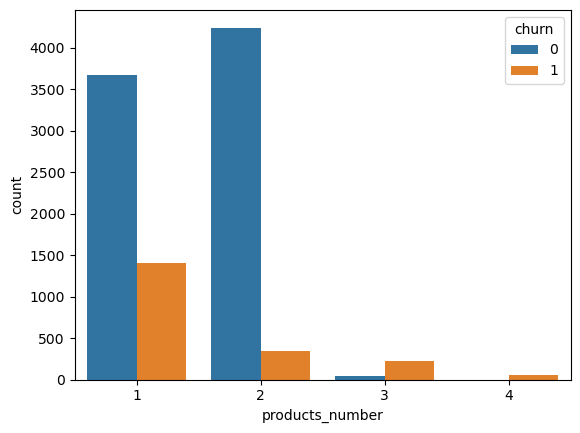

In [60]:
sns.countplot(x='products_number', hue='churn', data=data_frame)

#### A lot of those have left are those who purchased more through the bank

<AxesSubplot: xlabel='active_member', ylabel='count'>

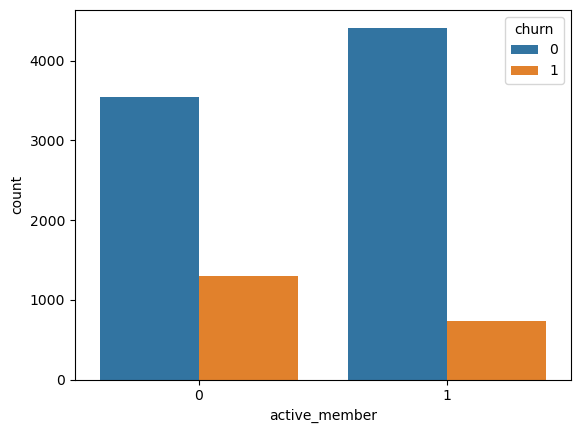

In [61]:
sns.countplot(x='active_member', hue='churn', data=data_frame)

#### The active members are the ones who have stayed a lot

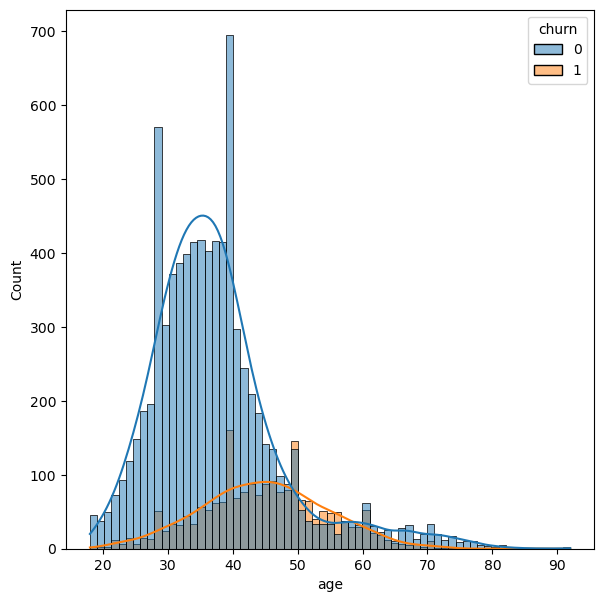

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
plt.subplot(122)
sns.histplot(data=data_frame,x='age',kde=True,hue='churn')
plt.show()

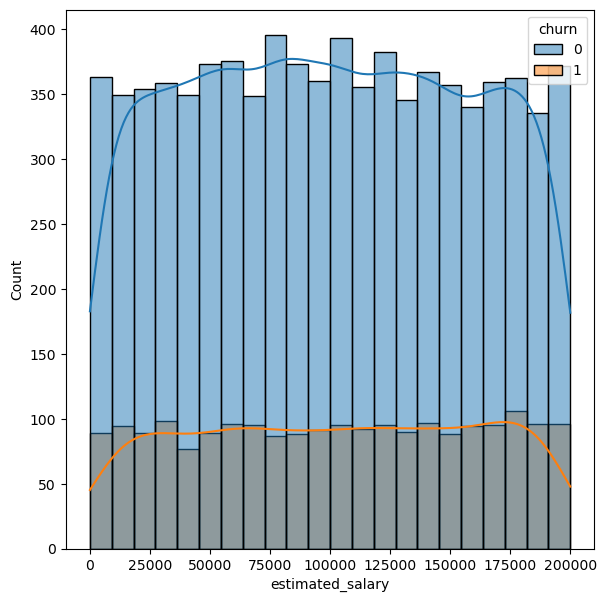

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
plt.subplot(122)
sns.histplot(data=data_frame,x='estimated_salary',kde=True,hue='churn')
plt.show()

### 4.3 Data Cleaning

In [64]:
# Drop irrelevant feature
df = data_frame.drop(['customer_id'], axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


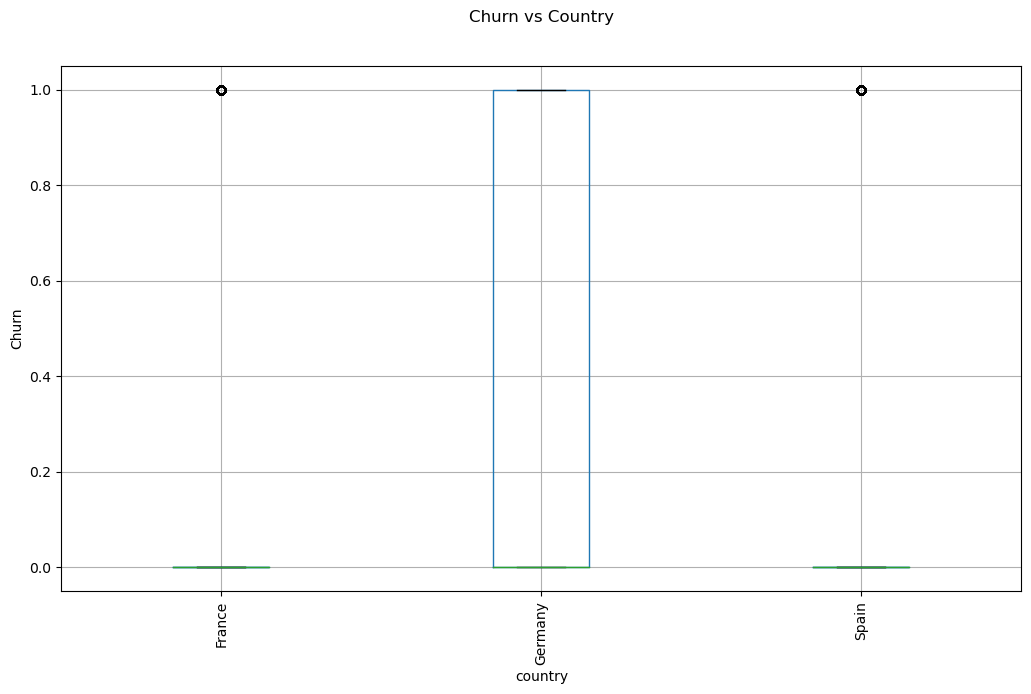

In [65]:
# Outlier Analysis
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('churn', 'country', ax=ax)
plt.suptitle('Churn vs Country')
plt.title('')
plt.ylabel('Churn')
plt.xticks(rotation=90)
plt.show()

In [66]:
# Check unique features before performing data encoding
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [67]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

### 4.4 Feature Engineering

In [68]:
# Data Encoding
from sklearn.preprocessing import LabelEncoder

el_country = LabelEncoder()
df['country'] = el_country.fit_transform(df['country'])
df['country'].unique()

array([0, 2, 1])

In [69]:
from sklearn.preprocessing import LabelEncoder

el_gender = LabelEncoder()
df['gender'] = el_gender.fit_transform(df['gender'])
df['gender'].unique()

array([0, 1])

In [70]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### 4.5 Univariate Analysis

<AxesSubplot: ylabel='churn'>

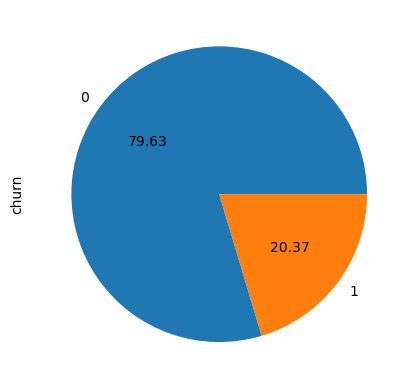

In [71]:
# Check again the distribution of our dataset to see the imbalance in it
df['churn'].value_counts().plot.pie(autopct='%.2f')

In [72]:
# Separate data
X = df.drop('churn', axis=1)
y = df['churn']

In [73]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [74]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [75]:
# balancing dataset
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)

In [76]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [77]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

### 4.6 Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [79]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
X_train

array([[-1.14776943, -0.88453501, -0.8403415 , ...,  0.78194268,
         1.30879608, -0.89953058],
       [ 1.09091305, -0.88453501,  1.18999241, ..., -1.27886612,
         1.30879608,  0.74480162],
       [ 1.27655989, -0.88453501, -0.8403415 , ...,  0.78194268,
        -0.76406097,  0.6218737 ],
       ...,
       [ 0.19544006, -0.88453501,  1.18999241, ...,  0.78194268,
        -0.76406097, -0.05694949],
       [ 0.34832569,  0.43920234,  1.18999241, ...,  0.78194268,
        -0.76406097, -0.16028932],
       [ 0.52305213,  0.43920234,  1.18999241, ...,  0.78194268,
         1.30879608, -0.82206097]])

### 5. Model Training

In [81]:
# Create a function for the models
def models(X_train, y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    from sklearn import svm
    sv = svm.SVC()
    sv.fit(X_train, y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    
    from sklearn.ensemble import GradientBoostingClassifier
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    
    
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]SVM Classifier Training Accuracy:', sv.score(X_train, y_train))
    print('[2]K-Neighbors Classifier Training Accuracy:', knn.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    print('[5]Gradient Boosting Classifier Training Accuracy:', gb.score(X_train, y_train))
    
    return log, sv, knn, tree, forest, gb

In [82]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7706436420722135
[1]SVM Classifier Training Accuracy: 0.850392464678179
[2]K-Neighbors Classifier Training Accuracy: 0.8759811616954474
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 1.0
[5]Gradient Boosting Classifier Training Accuracy: 0.8469387755102041


### 6. Choose best model

### 6.1 Metrics of the models and the testing accuracy

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ', i)
    print(classification_report(y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1633
           1       0.76      0.78      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186


Model  1
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.84      0.83      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186


Model  2
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1633
           1       0.81      0.84      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83  

### 6.2 Prediction

In [84]:
# Save the prediction
y_pred1 = model[0].predict(X_test)
print(y_pred1)
y_pred2 = model[1].predict(X_test)
print(y_pred2)
y_pred3 = model[2].predict(X_test)
print(y_pred3)
y_pred4 = model[3].predict(X_test)
print(y_pred4)
y_pred5 = model[4].predict(X_test)
print(y_pred5)
y_pred6 = model[5].predict(X_test)
print(y_pred6)

[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]


### 6.3 Print Accuracy Score for the testing Accouracy

In [85]:
model_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'Accuracy':[accuracy_score(y_test, y_pred1),
                                     accuracy_score(y_test, y_pred2),
                                     accuracy_score(y_test, y_pred3),
                                     accuracy_score(y_test, y_pred4),
                                     accuracy_score(y_test, y_pred5),
                                     accuracy_score(y_test, y_pred6)]})

model_data

,Models,Accuracy
0,LR,0.770245
1,SVC,0.837414
2,KNN,0.827684
3,DT,0.807282
4,RF,0.858757
5,GBC,0.835530


### 6.4 Visualize the Accuary

<AxesSubplot: xlabel='Models', ylabel='Accuracy'>

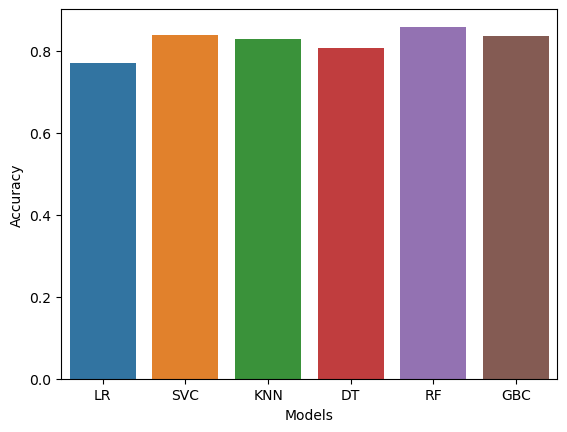

In [86]:
sns.barplot(x=model_data['Models'],y=model_data['Accuracy'])

### 6.5 Save the Model

In [87]:
X_res = sc.fit_transform(X_res)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_res, y_res)

RandomForestClassifier()

In [88]:
#import joblib

#joblib.dump(forest,'churn_model')

In [89]:
# Prediction with the saved model
#model = joblib.load('churn_model')

#model.predict([[619,0,0,42,2,0.00,1,1,1,0]])

In [90]:
import pickle
file = open('radom_f.pkl', 'wb')
pickle.dump(forest, file)